# Basic EDA Visualizations
## Scatterplots and line graphs

### Load and Manipulate Data - As from Clustering Files

In [3]:
#Packages
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import os, glob
from sklearn import preprocessing

In [6]:
#Load the census data
census_dat = pd.read_csv('../data/Census_Data_Cleaned.csv', dtype = 'str')

#Load the hospital beds data
beds_dat = pd.read_csv('../data/hospital_beds_data.csv', dtype = 'str')

#Load the cases data
cases_nyc = pd.read_csv('../data/tests-by-zcta.csv', dtype = 'str')

In [7]:
#Join all the values together
data = cases_nyc.merge(census_dat, how = 'left', left_on = 'MODZCTA', right_on = 'zip_code_tabulation_area')
data = data.merge(beds_dat, how = 'left', left_on = 'MODZCTA', right_on = 'zip')

data["beds"] = data["beds"].fillna(0)

In [8]:
#Remove the first record (no zip)
data = data[1:]

#Remove the zip code columns
data = data.loc[:, data.columns != 'zip_code_tabulation_area']
data = data.loc[:, data.columns != 'zip']

In [9]:
#Cast the rest of the columns as float
for col in data.columns:
    if col == "MODZCTA":
        continue 
    else:
        data.loc[:,col] = data.loc[:,col].astype(float)

In [10]:
data.head()

,MODZCTA,Positive,Total,zcta_cum.perc_pos,median_house_income,housing_units,pop_total,med_age,pop_perc_white,pop_perc_black,...,perc_transportation_warehousing,perc_utilites,perc_information,perc_finance,perc_scientific,perc_education_healthcare,perc_arts_entertainment,perc_otherservices,perc_publicadministration,beds
1,10001,288.0,685.0,42.04,86801.0,13305.0,23537.0,35.6,0.602456,0.121893,...,0.060729,0.005398,0.018893,0.020243,0.037787,0.191633,0.017544,0.018893,0.045884,0.0
2,10002,780.0,1603.0,48.66,33726.0,35691.0,80736.0,40.8,0.295605,0.086108,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,0.0
3,10003,368.0,977.0,37.67,98151.0,31575.0,57112.0,32.1,0.776352,0.043599,...,0.050100,0.008016,0.022044,0.040080,0.088176,0.126253,0.036072,0.026052,0.052104,501.0
4,10004,26.0,75.0,34.67,119691.0,2082.0,3221.0,33.1,0.705992,0.007141,...,0.000000,0.000000,0.000000,0.000000,0.312500,0.000000,0.000000,0.000000,0.000000,0.0
5,10005,48.0,156.0,30.77,124194.0,5254.0,8131.0,29.4,0.753413,0.029517,...,0.050412,0.004583,0.018332,0.032997,0.035747,0.156737,0.096242,0.039413,0.048579,0.0


### Plots of all census factors against Positive tests per 10k people

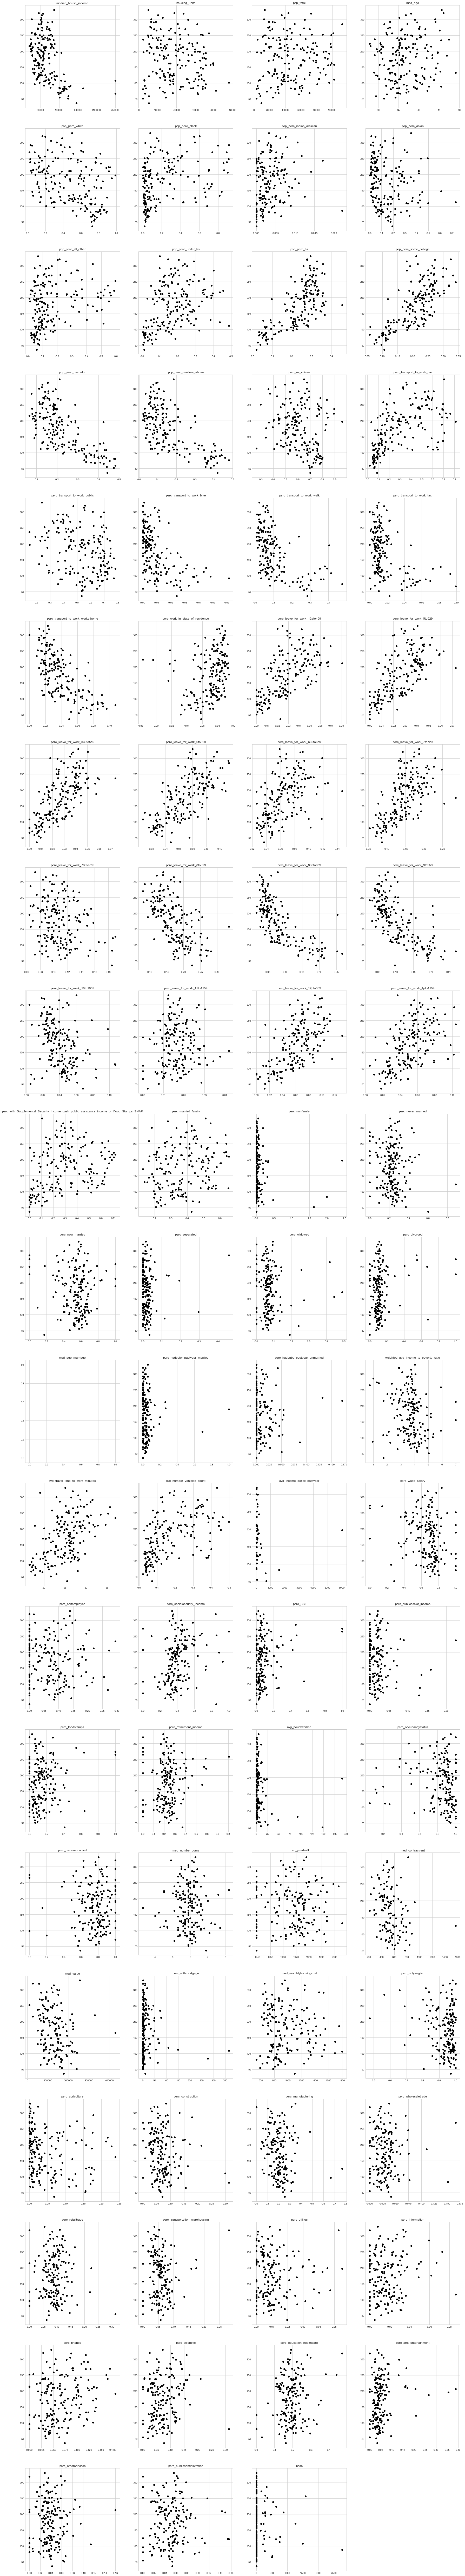

In [63]:
plt.figure(figsize = (30,50))

test_per_10k = data.Positive/(data.pop_total/10000)


count = 0
for i in range(4, 87):
    plt.subplot(22,4,i-3)
    col = str(data.columns[i])
    plt.plot(data[col], test_per_10k, 'o', color='black')
    plt.title(col)
    


plt.subplots_adjust(top=3.0)
plt.show();

### Plot with Median Household Income - log scale for outliers

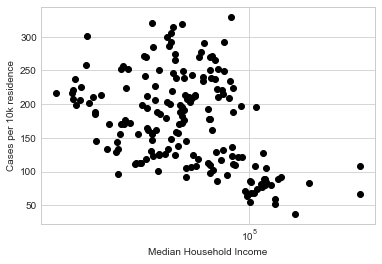

In [64]:
plt.plot(data.median_house_income,(data.Positive/(data.pop_total/10000)), 'o', color='black')
plt.xlabel("Median Household Income")
plt.ylabel("Cases per 10k residence")
plt.semilogx();

### Same plots, but using Total Tests instead of Positive Tests

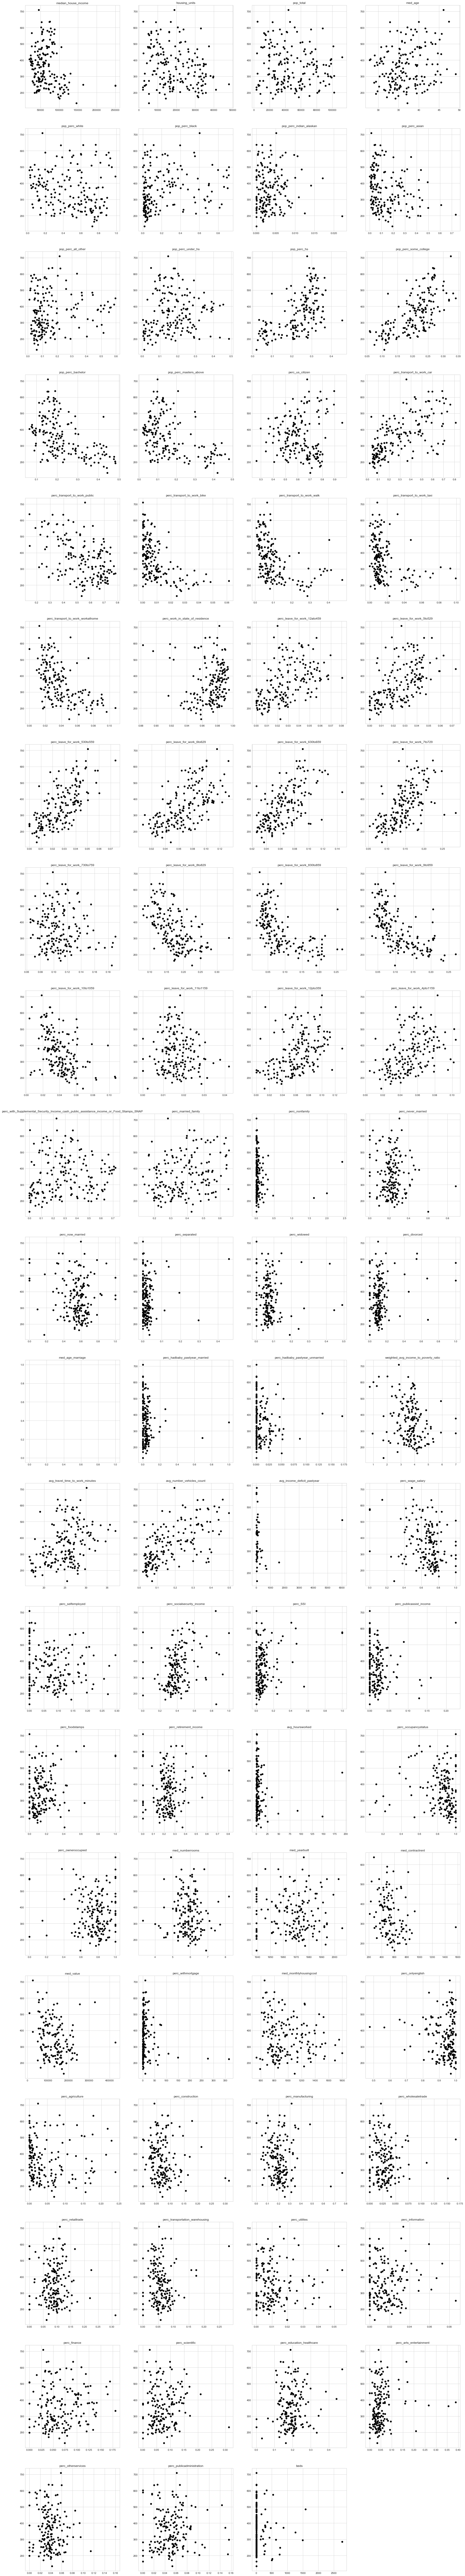

In [115]:
plt.figure(figsize = (30,50))

total_per_10k = data.Total/(data.pop_total/10000)


count = 0
for i in range(4, 87):
    plt.subplot(22,4,i-3)
    col = str(data.columns[i])
    plt.plot(data[col], total_per_10k, 'o', color='black')
    plt.title(col)
    


plt.subplots_adjust(top=3.0)
plt.show();

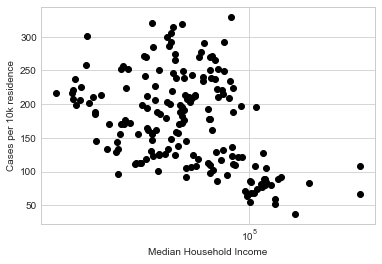

In [67]:
plt.plot(data.median_house_income,(data.Positive/(data.pop_total/10000)), 'o', color='black')
plt.xlabel("Median Household Income")
plt.ylabel("Cases per 10k residence")
plt.semilogx();

Note: The relationships with education especially are CRAZY! There is also a clear correlation with race (white and black specifically, also correlated to income/education). 

# Line Graphs

In [76]:
path = "../zcta-history/"

all_files = glob.glob(os.path.join(path, "*.csv"))

all_df = []
for f in all_files:
    df = pd.read_csv(f, sep=',')
    #add a column with the date
    df['Date'] = str(f)[21:26]
    all_df.append(df)
    
all_dates=pd.concat(all_df, sort=True)

In [101]:
daily_sum = all_dates.groupby("Date", as_index = False).sum()

In [102]:
daily_avg = all_dates.groupby("Date", as_index = False).mean()

In [142]:
prev = 0
disc_sum_pos = []
for i in daily_sum["Date"].tolist():   
    disc_sum_pos.append(int(daily_sum[daily_sum["Date"]==i].Positive) - prev)
    prev = int(daily_sum[daily_sum["Date"]==i].Positive)

In [143]:
prev = 0
disc_sum_tot = []
for i in daily_sum["Date"].tolist():   
    disc_sum_tot.append(int(daily_sum[daily_sum["Date"]==i].Total) - prev)
    prev = int(daily_sum[daily_sum["Date"]==i].Total)

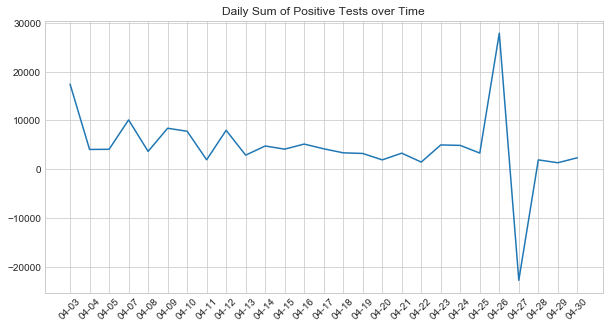

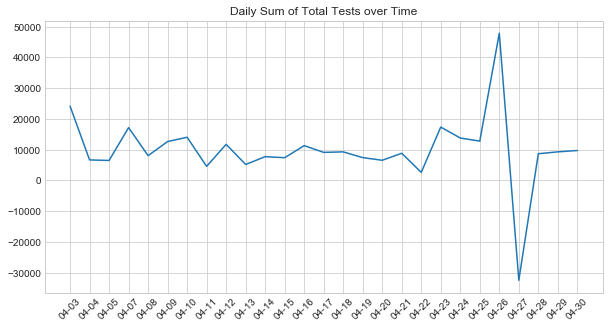

In [145]:
plt.figure(figsize = (10,5))
plt.plot(daily_sum["Date"].tolist()[1:], disc_sum_pos[1:])
plt.xticks(rotation=45)
plt.title("Daily Sum of Positive Tests over Time")
plt.show();

plt.figure(figsize = (10,5))
plt.plot(daily_sum["Date"].tolist()[1:], disc_sum_tot[1:])
plt.xticks(rotation=45)
plt.title("Daily Sum of Total Tests over Time")
plt.show();

In [203]:
prev = 0
disc_avg_pos = []
for i in daily_avg["Date"].tolist():   
    disc_avg_pos.append(int(daily_avg[daily_sum["Date"]==i].Positive) - prev)
    prev = int(daily_avg[daily_avg["Date"]==i].Positive)

In [206]:
prev = 0
disc_avg_tot = []
for i in daily_avg["Date"].tolist():   
    disc_avg_tot.append(int(daily_avg[daily_sum["Date"]==i].Total) - prev)
    prev = int(daily_avg[daily_avg["Date"]==i].Total)

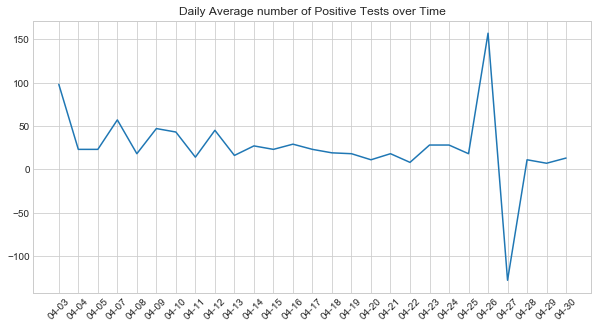

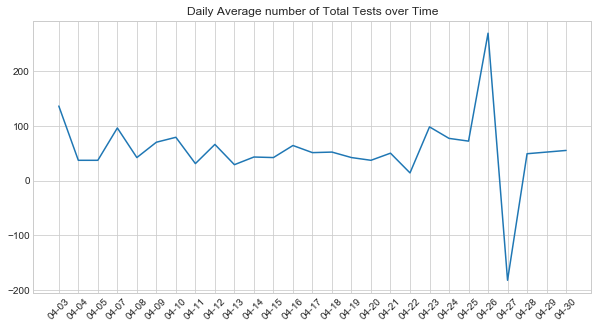

In [207]:
plt.figure(figsize = (10,5))
plt.plot(daily_avg["Date"].tolist()[1:], disc_avg_pos[1:])
plt.title("Daily Average number of Positive Tests over Time")
plt.xticks(rotation=45)
plt.show();

plt.figure(figsize = (10,5))
plt.plot(daily_avg["Date"].tolist()[1:], disc_avg_tot[1:])
plt.title("Daily Average number of Total Tests over Time")
plt.xticks(rotation=45)
plt.show();

Note: This assumes that the data is cumulative. We may need to investiage what happened on April 26th. 